# Developing an Income Classifier System for individuals

## Importing necessary packages

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [4]:
#Importing data
data_income=pd.read_csv('income.csv')
print(data_income.head())

   age       JobType         EdType        maritalstatus       occupation  \
0   45       Private        HS-grad             Divorced     Adm-clerical   
1   24   Federal-gov        HS-grad        Never-married     Armed-Forces   
2   44       Private   Some-college   Married-civ-spouse   Prof-specialty   
3   27       Private            9th        Never-married     Craft-repair   
4   20       Private   Some-college        Never-married            Sales   

      relationship    race   gender  capitalgain  capitalloss  hoursperweek  \
0    Not-in-family   White   Female            0            0            28   
1        Own-child   White     Male            0            0            40   
2          Husband   White     Male            0            0            40   
3   Other-relative   White     Male            0            0            40   
4    Not-in-family   White     Male            0            0            35   

    nativecountry                        SalStat  
0   United-

In [5]:
#Creating a copy of the original data
data=data_income.copy()

## Exploratory Data Analysis

In [6]:
#Getting to know the data
print(data.info()) #To check variables data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None


In [7]:
#Checking for the missing values
print(data.isnull().head())

     age  JobType  EdType  maritalstatus  occupation  relationship   race  \
0  False    False   False          False       False         False  False   
1  False    False   False          False       False         False  False   
2  False    False   False          False       False         False  False   
3  False    False   False          False       False         False  False   
4  False    False   False          False       False         False  False   

   gender  capitalgain  capitalloss  hoursperweek  nativecountry  SalStat  
0   False        False        False         False          False    False  
1   False        False        False         False          False    False  
2   False        False        False         False          False    False  
3   False        False        False         False          False    False  
4   False        False        False         False          False    False  


In [8]:
print("Data columns with null values: \n",data.isnull().sum())

Data columns with null values: 
 age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64


In [9]:
#Summary of numerical variables
summary_sum=data.describe()
print(summary_sum)

                age   capitalgain   capitalloss  hoursperweek
count  31978.000000  31978.000000  31978.000000  31978.000000
mean      38.579023   1064.360623     86.739352     40.417850
std       13.662085   7298.596271    401.594301     12.345285
min       17.000000      0.000000      0.000000      1.000000
25%       28.000000      0.000000      0.000000     40.000000
50%       37.000000      0.000000      0.000000     40.000000
75%       48.000000      0.000000      0.000000     45.000000
max       90.000000  99999.000000   4356.000000     99.000000


In [10]:
#Summary of categorical variables
summary_cate=data.describe(include='O')
print(summary_cate)

         JobType    EdType        maritalstatus       occupation relationship  \
count      31978     31978                31978            31978        31978   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22286     10368                14692             4038        12947   

          race gender   nativecountry                        SalStat  
count    31978  31978           31978                          31978  
unique       5      2              41                              2  
top      White   Male   United-States   less than or equal to 50,000  
freq     27430  21370           29170                          24283  


In [11]:
#Frequency of each category
print(data['JobType'].value_counts())
print(data['occupation'].value_counts())

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64


In [12]:
#Checking for unique values
print(np.unique(data['JobType']))
print(np.unique(data['occupation'])) #There exists '?' instead of nan

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


In [13]:
#Go back and read data by including "na_values['?']" to consider '?' as nan
data=pd.read_csv('income.csv',na_values=['?'])

In [14]:
#Data preprocessing
print(data.isnull().sum())


age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64


In [15]:
missing=data[data.isnull().any(axis=1)]
#axis=1 to consider at least one column is missing

In [16]:
data2=data.dropna(axis=0) #dropping the rows with missing values

In [17]:
#Relationship between independent variables
correlation=data2.corr()

## Cross table and Data Visualization

In [18]:
#Extracting the column names
print(data2.columns)

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')


In [19]:
#Gender proportion table
gender=pd.crosstab(index=data2['gender'],columns='count',normalize=True)
print(gender)

col_0       count
gender           
 Female  0.331728
 Male    0.668272


In [20]:
#Gender vs Salary Status
gender_salstat=pd.crosstab(index=data2['gender'],columns=data2['SalStat'],margins=True,normalize='index')
print(gender_salstat)

SalStat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.109540                       0.890460
 Male                0.305709                       0.694291
All                  0.240634                       0.759366


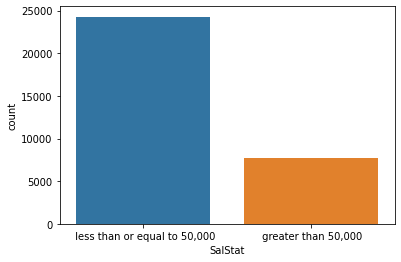

In [21]:
#Frequency Distribution of Salary Status
SalStat=sns.countplot(x=data2['SalStat'])

<AxesSubplot:>

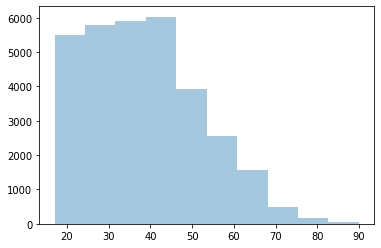

In [59]:
#Histogram of age
sns.distplot(x=data2['age'],bins=10,kde=False)
#People with age 20-45 are high in frequency

SalStat
 greater than 50,000             44.0
 less than or equal to 50,000    34.0
Name: age, dtype: float64

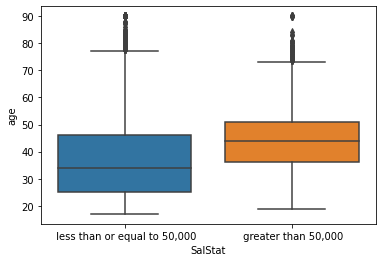

In [23]:
#Box Plot - Age vs Salary Status
sns.boxplot(x='SalStat',y='age',data=data2)
data2.groupby('SalStat')['age'].median()

## Logistic Regression

In [24]:
#Reindexing the salary status names to 0,1
#data2['SalStat']=data2['SalStat'].map({'less than or equal to 50,000':0,'greater than 50,000':1})
data2['SalStat']=np.where(data2['SalStat'].str.contains('less than or equal to 50,000'),0,1)
print(data2['SalStat'])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 31978, dtype: int64


In [25]:
#Dummy Analysis
new_data=pd.get_dummies(data2,drop_first=True)
print(new_data.head())

   age  capitalgain  capitalloss  hoursperweek  SalStat  JobType_ Federal-gov  \
0   45            0            0            28        0                     0   
1   24            0            0            40        0                     1   
2   44            0            0            40        1                     0   
3   27            0            0            40        0                     0   
4   20            0            0            35        0                     0   

   JobType_ Local-gov  JobType_ Never-worked  JobType_ Private  \
0                   0                      0                 1   
1                   0                      0                 0   
2                   0                      0                 1   
3                   0                      0                 1   
4                   0                      0                 1   

   JobType_ Self-emp-inc  ...  nativecountry_ Portugal  \
0                      0  ...                        0   


In [26]:
#Storing the column names
columns_list=list(new_data.columns)
print(columns_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'JobType_ Federal-gov', 'JobType_ Local-gov', 'JobType_ Never-worked', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupati

In [27]:
#Separating the input names from data
features=list(set(columns_list)-set(['SalStat']))
print(features)

['maritalstatus_ Never-married', 'nativecountry_ Haiti', 'nativecountry_ Laos', 'nativecountry_ Holand-Netherlands', 'EdType_ Assoc-acdm', 'EdType_ 5th-6th', 'race_ Other', 'nativecountry_ Poland', 'occupation_ Other-service', 'occupation_ Sales', 'occupation_ Machine-op-inspct', 'nativecountry_ Ireland', 'nativecountry_ Canada', 'JobType_ Self-emp-not-inc', 'EdType_ Prof-school', 'JobType_ Self-emp-inc', 'race_ Black', 'occupation_ Farming-fishing', 'race_ White', 'nativecountry_ Columbia', 'nativecountry_ Ecuador', 'nativecountry_ Italy', 'nativecountry_ South', 'EdType_ 1st-4th', 'maritalstatus_ Married-spouse-absent', 'occupation_ Armed-Forces', 'nativecountry_ Portugal', 'nativecountry_ Yugoslavia', 'nativecountry_ Germany', 'nativecountry_ England', 'occupation_ Adm-clerical', 'maritalstatus_ Married-AF-spouse', 'nativecountry_ Thailand', 'nativecountry_ China', 'JobType_ Without-pay', 'nativecountry_ Cuba', 'JobType_ State-gov', 'nativecountry_ Hong', 'nativecountry_ United-Stat

In [28]:
#Storing the output values in y
y=new_data['SalStat'].values
print(y)

[0 0 1 ... 0 0 0]


In [29]:
#Storing the values from input features
x=new_data[features].values
print(x)

[[0 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [30]:
#Splitting the data into train and test
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=0)


In [31]:
#Make an instance of the Model
logistic=LogisticRegression(max_iter=1500)


In [32]:
#Fitting the values of x and y
logistic.fit(train_x,train_y)
print(logistic.coef_)
print(logistic.intercept_)
 

[[-6.89171556e-01 -7.01332500e-02 -3.73499810e-02 -3.01814926e-03
   1.36175934e-01 -7.73143235e-01 -5.77689655e-01 -9.90034426e-02
  -9.55097727e-01  3.03035869e-01 -3.45953971e-01  1.56328932e-02
   2.30341260e-02 -3.65322365e-01  1.23874294e+00  9.32051358e-02
  -7.26415604e-01 -9.98703436e-01 -6.45811564e-01 -1.46805174e-01
  -2.36086508e-02  4.68293377e-02 -2.54601508e-01 -4.39390481e-01
  -2.86425965e-01 -3.11626457e-02 -1.42202545e-01  3.16035801e-02
   1.24529475e-01 -1.65784493e-03  3.42092557e-02  1.60859605e-01
  -4.77404481e-02 -2.11865869e-01 -4.36604267e-02 -6.09240798e-02
  -4.39128638e-01 -3.45833806e-02  5.30034287e-02 -1.22301141e+00
  -2.06917251e-01  1.98139069e-03  1.94317382e-02 -3.19280915e-01
  -1.99258304e-01 -1.12866734e+00 -7.81466374e-01  8.75535261e-02
  -1.75520737e-01  1.02542327e+00 -4.96446711e-01 -1.36336460e-01
   6.88978441e-01 -8.66083542e-01  5.30678399e-01 -7.16166328e-01
   7.16988186e-01 -2.85875156e-02 -9.98831924e-01 -1.10563546e+00
  -2.27277

In [33]:
#Prediction from test data
prediction=logistic.predict(test_x)
print(prediction)

[0 0 0 ... 0 0 0]


In [34]:
#Confusion matrix
confusion_matrix1=confusion_matrix(test_y,prediction)
print(confusion_matrix1)

[[6825  511]
 [ 917 1341]]


In [35]:
#Calculating the accuracy
accuracy_score1=accuracy_score(test_y,prediction)
print(accuracy_score1)

0.8511569731081926


In [36]:
#Printing misclassified values from prediction
print("Misclassified samples : %d " % (test_y!=prediction).sum())

Misclassified samples : 1428 


### Logistic Regression - Removing insignificant variables

In [37]:
#Reindexing the salary status names to 0,1
#data2['SalStat']=data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
#data2['SalStat']=np.where(data2['SalStat'].str.contains('less than or equal to 50,000'),0,1)

#print(data2['SalStat'])

In [38]:
cols=['gender','nativecountry','race','JobType']
new_data=data2.drop(cols,axis=1)

In [39]:
new_data=pd.get_dummies(new_data,drop_first=True)

In [40]:
#Storing the column names
columns_list=list(new_data.columns)
print(columns_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-serv', 'occupation_ Sales', 'occupation_ Tech-support', 'occupation_ Transport-moving', 'relationship_ Not-in-famil

In [41]:
#Separating the input names from data
features=list(set(columns_list)-set(['SalStat']))
print(features)

['maritalstatus_ Never-married', 'EdType_ 12th', 'occupation_ Transport-moving', 'maritalstatus_ Married-civ-spouse', 'EdType_ Assoc-acdm', 'EdType_ 5th-6th', 'occupation_ Handlers-cleaners', 'occupation_ Other-service', 'occupation_ Sales', 'relationship_ Not-in-family', 'EdType_ Bachelors', 'occupation_ Machine-op-inspct', 'occupation_ Craft-repair', 'EdType_ 9th', 'relationship_ Unmarried', 'EdType_ Prof-school', 'occupation_ Farming-fishing', 'age', 'maritalstatus_ Separated', 'occupation_ Tech-support', 'occupation_ Prof-specialty', 'EdType_ 1st-4th', 'maritalstatus_ Married-spouse-absent', 'occupation_ Armed-Forces', 'EdType_ Masters', 'capitalloss', 'occupation_ Adm-clerical', 'occupation_ Protective-serv', 'relationship_ Own-child', 'maritalstatus_ Married-AF-spouse', 'EdType_ Some-college', 'hoursperweek', 'EdType_ 7th-8th', 'occupation_ Exec-managerial', 'EdType_ 11th', 'EdType_ Doctorate', 'occupation_ Priv-house-serv', 'maritalstatus_ Widowed', 'EdType_ Preschool', 'relatio

In [42]:
#Storing the output values to y
y=new_data['SalStat'].values
print(y)


[0 0 1 ... 0 0 0]


In [43]:
#Separating the values from input features
x=new_data[features].values
print(x)

[[0 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [1 0 0 ... 0 0 0]]


In [44]:
#Splitting the data into train and test set
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=True)

In [45]:
#Make an instance of the Model
logistic=LogisticRegression(max_iter=1500)


In [46]:
#Fitting the values of x and y
logistic.fit(train_x,train_y)

LogisticRegression(max_iter=1500)

In [47]:
#Predicting from test data
prediction=logistic.predict(test_x)

In [48]:
#Calculating the accuracy
accuracy_score2=accuracy_score(test_y,prediction)
print(accuracy_score2)

0.8475088597039817


In [49]:
#Printing misclassified values from prediction
print("Misclassified samples: %d " %(test_y!=prediction).sum())

Misclassified samples: 1463 


## KNN Model 

In [50]:
#importing the library of KNN
from sklearn.neighbors import KNeighborsClassifier
#import library for plotting
import matplotlib.pyplot as plt

In [51]:
#Storing the k nearest neighbours classifier
KNN_classifier=KNeighborsClassifier(n_neighbors=5)

In [52]:
#Fitting the values for x and y
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=0)

KNN_classifier.fit(train_x,train_y)

KNeighborsClassifier()

In [53]:
#Predicting the test values with model
prediction=KNN_classifier.predict(test_x)

In [54]:
#Performance matrix check
confusion_matrix2=confusion_matrix(test_y,prediction)
print('\t','Predicted values')
print('Original values','\n',confusion_matrix2)

	 Predicted values
Original values 
 [[6672  664]
 [ 859 1399]]


In [55]:
#Calculatting Accuracy
accuracy_score=accuracy_score(test_y,prediction)
print(accuracy_score)

0.8412549510110485


In [56]:
#Misclassified Samples
print("Misclassified Samples: %d " % (test_y!=prediction).sum())

Misclassified Samples: 1523 


### Effect of k value on classifier

In [57]:
Misclassified_Samples=[]
#Calculating errors for k values between 1 and 20
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    pred_i=knn.predict(test_x)
    Misclassified_Samples.append((test_y!=pred_i).sum())
print(Misclassified_Samples)

[1751, 1509, 1599, 1495, 1523, 1463, 1485, 1468, 1475, 1453, 1490, 1458, 1452, 1433, 1444, 1422, 1428, 1394, 1437]


# End of Script